# Credit Card Fraud Detection
In this notebook project, we will be tackling the task of predicting fraudulent credit card transactions using a dataset containing transactions made by European cardholders in September 2013. The primary goal is to develop a machine learning model that can accurately classify transactions as either fraud or not fraud, enabling credit card companies to identify and prevent unauthorized charges. The dataset presents a highly unbalanced distribution, with only 0.172% of the transactions labeled as fraud. It consists of numerical input variables resulting from a PCA transformation, with the exception of the 'Time' and 'Amount' features. The 'Time' feature represents the time elapsed in seconds between each transaction and the first transaction in the dataset, while the 'Amount' feature denotes the transaction amount. By leveraging these features and employing advanced machine learning techniques, we aim to build a robust model that can effectively detect fraudulent credit card activities.

## Content
1. Define the Problem
2. Gather the Data
3. Prepare Data for Consumption
4. Perform Exploratory Analysis with Statistics
5. Model Data
6. Validate and Implement
7. Optimize and Strategize

## 1. Define the Problem
For this project, the task is to develop a predictive model that can accurately classify credit card transactions as fraudulent or non-fraudulent. The goal is to build an algorithm that can effectively identify fraudulent transactions, aiding credit card companies in preventing unauthorized charges and minimizing financial losses.

## 2. Gather the Data
We will use the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset which are anonymized credit card transactions labeled as fraudulent or genuine.

## 3. Prepare Data for Consumption

### 3.1 Import Libraries
We prepare the libraries we will use by importing them

In [262]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn import svm, tree, linear_model, neighbors, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.base import BaseEstimator

from scipy import stats
from joblib import dump, load
import time
import warnings


sns.set_theme()

### 3.2 Meet and Greet Data
We gain an understanding of our dataset.

#### 3.2.1 Dataset Description
The dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

<b>Target variable</b>
- `Class`: is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<b>Feature variables</b>
- `V1`, `V2`, … `V28`: are the principal components obtained with PCA
- `Time`: contains the seconds elapsed between each transaction and the first transaction in the dataset.
- `Amount`: is the transaction amount.

#### 3.2.2 Dataset Structure
We also want to know the structure of our dataset aside from just what was provided initially.
- There are 31 columns and 284807 rows. Every feature is of type float while the class is of type int.

In [263]:
credit_df = pd.read_csv('creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [264]:
# show structure
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### 3.2.3 Class Distribution
Next, we want to find the distribution of our classes: <b>0</b> for `Not Fraud` and <b>1</b> for `Fraud`.
- We find that the plot shows the distribution of Fraud and Not-Fraud transactions wherein we see that our majority class of Not-Fraud accounts for 99.8% of our dataset. This extreme imbalance poses several problems:
    - Skewed Model Performance: Class imbalance can lead to biased model performance, as the model may prioritize the majority class and struggle to effectively learn from the minority class.
    - Misclassification Costs: The cost of misclassifying a fraudulent transaction as non-fraudulent can be substantial, both in terms of financial losses and customer trust.
    - Model Generalization: Imbalanced data may result in models that are overly specialized in predicting the majority class, leading to reduced generalization ability on unseen data.
- No worries, there are fixes we can do. One of which is undersampling.

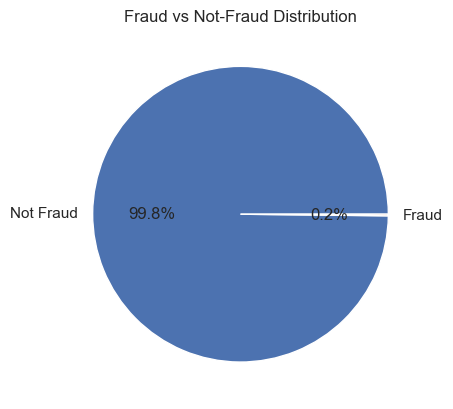

In [265]:
# show class distribution
labels = ['Not Fraud', 'Fraud']
sizes = credit_df['Class'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Fraud vs Not-Fraud Distribution')
plt.show()

#### 3.2.3 Feature Distribution
We also want to see the distribution of our features. By examining the distribution of our features, we are able to see their interesting properties such as range, central tendency, spread, and skewness. These information will help in our choice of scaling techniques.
- `Time` feature is not normally distributed.
- `Amount` feature has outliers.

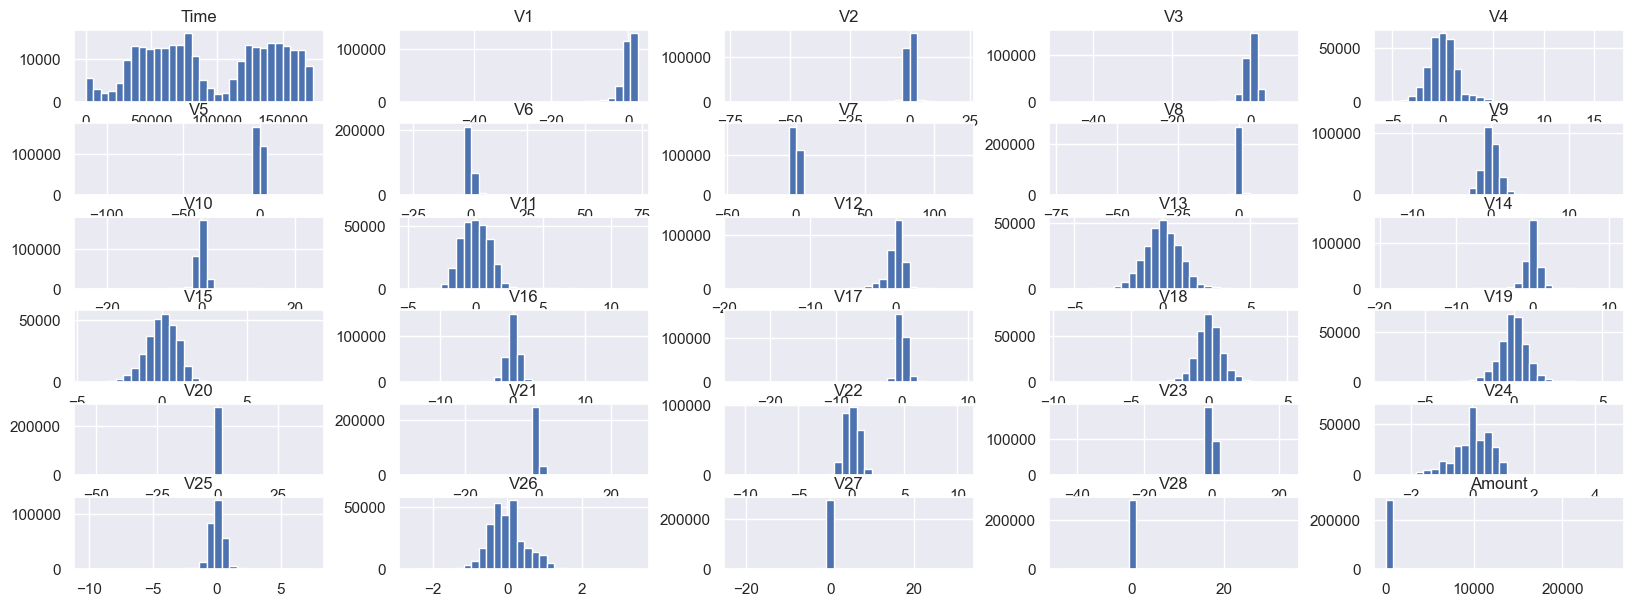

In [266]:
# show features distribution
credit_df.iloc[:,:-1].hist(figsize=(20,7), bins=30)
plt.show()

A statistical summary which will show the mean, standard deviation, min, quartiles, max for each feature will also help us know if there is something wrong with our data.
- Features V1, V2,..., V28 were mentioned to be the result of Principal Component Analysis (PCA) as described by the dataset author. Given that prior performing PCA, they need to be scaled we know that these are already scaled.
- Now we need to also scale `Time` and `Amount` for analysis and as a preparation to model training.

In [267]:
# show statistical summary
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 3.3 Clean Data
We clean our dataset by fixing missing values, incorrect data, doing feature scaling and other measures to make sure that our dataset will be ready to use for analysis and data modeling.

#### 3.3.1 Missing Values
We want to check if there are missing values in our dataset.
- We see no missing value in any column.

In [268]:
# check if there is missing
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 3.3.2 Feature Scaling
We want to scale our features `Time` and `Amount` for analysis and in preparation to modeling.
- <b>MinMaxScaler</b>- is a scaling technique that linearly rescales a feature to a specified range, typically between 0 and 1. It is a suitable choice for the `Time` feature in this example because it can normalize the values within the desired range while preserving the original distribution shape, even if the feature exhibits a non-normal distribution or a bimodal distribution.
- <b>RobustScaler</b>- is a scaling technique that is robust to outliers because it uses robust statistics (median and interquartile range) instead of mean and standard deviation. It is used when dealing with data that has outliers or a non-normal distribution. This scaler is a good choice for our feature `Amount` which has shown to have a wide range of values and contains outliers.

In [269]:
# scale the features `Time` and `Amount`
time_scaler = MinMaxScaler()
amount_scaler = RobustScaler()

credit_df['Time'] = time_scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))
credit_df['Amount'] = amount_scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))

In [270]:
credit_df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,0.548717,0.927124
std,0.274828,3.495006
min,0.000000,-0.307413
25%,0.313681,-0.229162
50%,0.490138,0.000000
75%,0.806290,0.770838
max,1.000000,358.683155


#### 3.3.3 Split Training and Testing Data
We need to split our dataset for testing later. The training set will be used to train our ML models. On the other hand, the test set will be used to evaluate our ML models to see how it would perform on 'unseen data'.

In [271]:
# split dataset
X = credit_df.iloc[:,:-1]
y = credit_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

#### 3.3.3 Fixing Imbalance: Undersampling
As previously mentioned, an imbalanced dataset is not ideal. To address the class imbalance, we can employ various techniques, one which we'll use is <b>Undersampling</b>. It involves reducing the number of instances in the majority class to match the number of instances in the minority class. It helps create a balanced dataset and enables the model to learn from both classes equally.

Advantages of Undersampling:
1. Mitigates Bias: Undersampling reduces the bias towards the majority class, allowing the model to focus equally on both classes during training.
2. Computational Efficiency: With a reduced dataset size, undersampling can lead to faster training times and lower computational requirements.
3. Enhanced Generalization: By providing a balanced representation of both classes, undersampling can improve the model's ability to generalize and perform well on unseen data.

Disadvantages of Undersampling:
1. Information Loss: Removing instances from the majority class may result in the loss of potentially valuable information, which can affect the model's ability to learn intricate patterns.
2. Increased Risk of Overfitting: With a smaller training set, there is a higher risk of overfitting, where the model may memorize the training instances instead of learning meaningful patterns.
3. Reduced Statistical Power: Undersampling can lead to a decrease in the statistical power of the model, making it less robust in capturing the true underlying patterns in the data.

In [272]:
# perform undersampling
class_ratio = 1
under_sampler = RandomUnderSampler(sampling_strategy=class_ratio, random_state=1)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
# merge back for analysis
credit_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# count distribution before and after undersampling
unique_before, counts_before = np.unique(y_train, return_counts=True)
class_distribution_before = dict(zip(unique_before, counts_before))
unique_after, counts_after = np.unique(y_train_resampled, return_counts=True)
class_distribution_after = dict(zip(unique_after, counts_after))

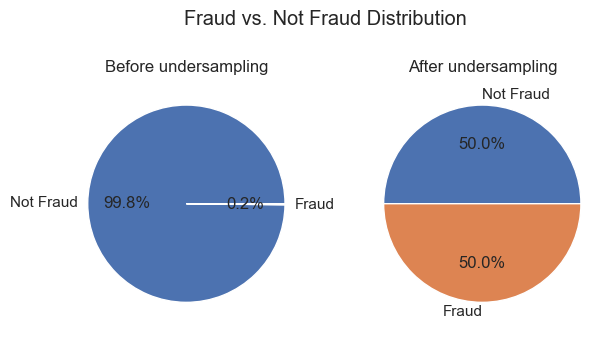

Class distribution BEFORE undersampling: {0: 227451, 1: 394}
Class distribution AFTER undersampling: {0: 394, 1: 394}


In [273]:
# plot fraud vs not fraud chart
labels = ['Not Fraud', 'Fraud']

# create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(7,4))
fig.suptitle('Fraud vs. Not Fraud Distribution')
# plot for before undersampling
ax1.pie(counts_before, labels=labels, autopct='%1.1f%%')
ax1.set_title('Before undersampling')
# plot for after undersampling
ax2.pie(counts_after, labels=labels, autopct='%1.1f%%')
ax2.set_title('After undersampling')


plt.show()

print("Class distribution BEFORE undersampling:", class_distribution_before)
print("Class distribution AFTER undersampling:", class_distribution_after)

## 4. Perform Exploratory Analysis with Statistics

### 4.1 Correlation
<b>Correlation matrices</b>- help us understand which features heavily affect whether a transaction is a fraud or genuine. Its value ranges from 0-1 wherein values closer to 0 means
<i>stronger negative correlation</i> while values closer to 1 means <i>stronger positive correlation</i> .
- Positive Correlation- features `V4` and `V11` are positively correlated to `Class`. This means that the higher the value of these features, the more likely a transaction is fraudulent.
- Negative Correlation- features `V14`, `V12`, `V10`, `V16`, `V3`, `V9`, and `V17` are negatively correlated to `Class`. This means that the lower the value of these features, the more likely a transaction is fraudulent.

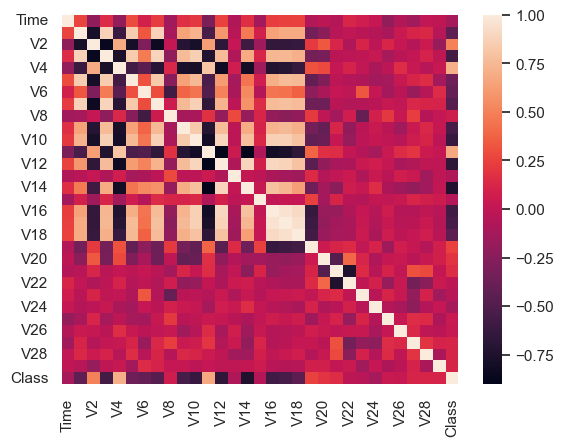

In [274]:
credit_corr = credit_df_resampled.corr()
sns.heatmap(credit_corr)
plt.show()

In [275]:
# show columns which have a high correlation to 'Class'
credit_corr['Class'][(credit_corr['Class'].values > .5) | (credit_corr['Class'].values < -.5)].sort_values(ascending=False)

Class    1.000000
V4       0.706510
V11      0.668687
V17     -0.542792
V9      -0.549432
V3      -0.565626
V16     -0.581767
V10     -0.621334
V12     -0.668948
V14     -0.741923
Name: Class, dtype: float64

### 4.2 Clustering using Dimensionality Reduction
Dimensionality Reduction Techniques provide valuable means to reduce the number of features in a dataset, facilitating easier visualization and potentially improving the performance of predictive models. In this section, we explore three common techniques for dimensionality reduction: t-SNE, PCA, and Truncated SVD.
1. <b>t-SNE</b> (t-Distributed Stochastic Neighbor Embedding): t-SNE is a nonlinear dimensionality reduction technique that aims to map high-dimensional data into a lower-dimensional space while preserving local similarities between data points. It is particularly useful for visualizing complex datasets and capturing non-linear relationships between variables.
2. <b>PCA</b> (Principal Component Analysis): PCA is a linear dimensionality reduction technique that identifies the directions (principal components) of maximum variance in the data and projects the data onto these components. It allows for the reduction of data dimensions while preserving as much variance as possible. PCA is widely used for feature extraction and visualization.
3. <b>Truncated SVD</b> (Singular Value Decomposition): Truncated SVD is a variant of SVD, a linear algebra technique used for matrix decomposition. Truncated SVD approximates the original matrix by reducing its rank and retaining only the most informative singular values and corresponding singular vectors. It is often used for dimensionality reduction, especially with sparse data.

When applying the t-SNE algorithm to our dataset,
 - we observed that t-SNE could accurately cluster the fraud and non-fraud cases. This indicates that further predictive models have a good chance of effectively differentiating between fraudulent and non-fraudulent transactions based on the patterns detected by t-SNE.

In [276]:
# implement dimensionality reduction techniques
X = X_train_resampled.values
y = y_train_resampled.values

# T-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=69).fit_transform(X)
# PCA
X_reduced_pca = PCA(n_components=2, random_state=69).fit_transform(X)
# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, random_state=69).fit_transform(X)

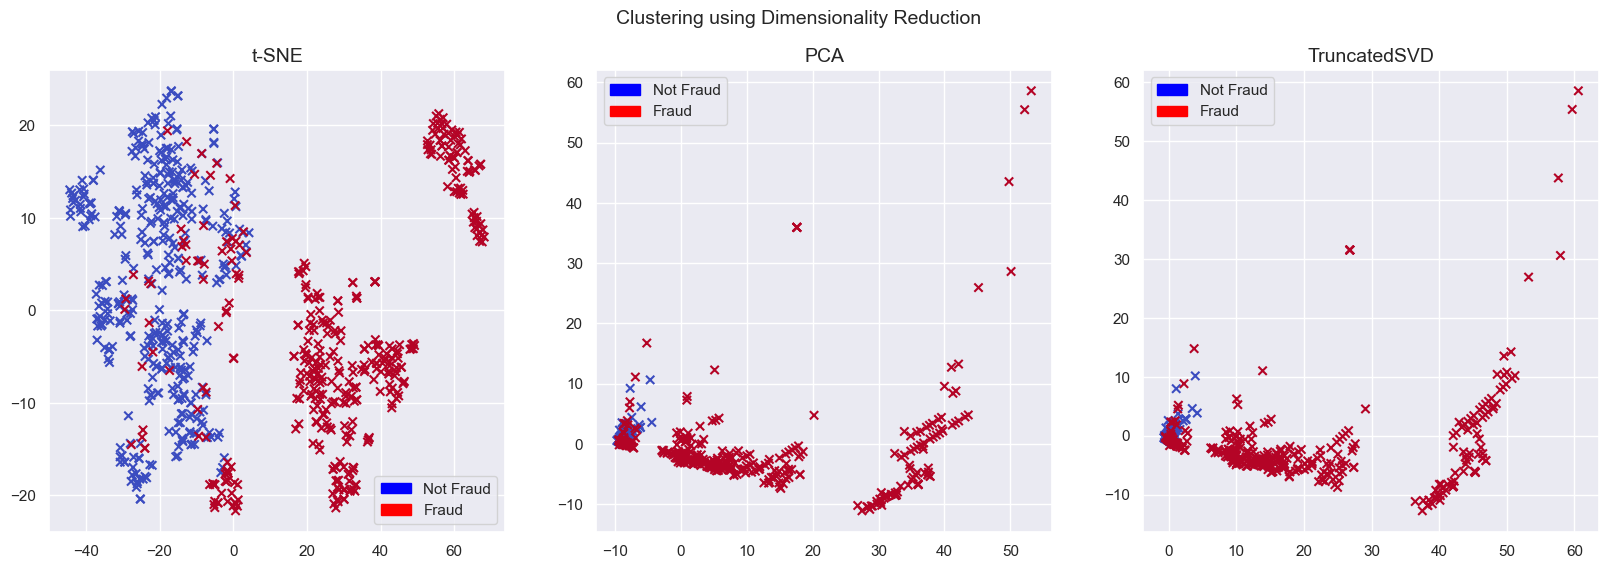

In [277]:
# plot fraud vs not fraud clusters
labels = ['Not Fraud', 'Fraud']

# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Clustering using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='blue', label='Not Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap='coolwarm', marker='x', label='t-SNE')
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', marker='x', label='PCA')
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', marker='x', label='TruncatedSVD')
ax3.set_title('TruncatedSVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## 5. Model the Data

### 5.1 Model selection
We want to select the top performing models.

#### 5.1.1 Experiment with Many Models (Default hyperparameters)
Running multiple models with their default hyperparameters allows us to quickly evaluate their performance and identify promising candidates. This initial experiment will provide a baseline understanding of how different models perform on your dataset without spending extensive time on hyperparameter optimization.

Once we have identified the models that perform well in the initial experiment, we can then focus our efforts on further improving those models through hyperparameter tuning. <b>Hyperparameter</b> tuning involves systematically exploring different hyperparameter configurations to find the best set of hyperparameters that optimize the model's performance.

We will use the following metrics:
1. <b>Accuracy:</b> The ratio of correct predictions to the total number of predictions.
2. <b>Precision:</b> The proportion of true positive predictions among the total positive predictions.
3. <b>Recall:</b> The proportion of true positive predictions among the actual positive instances.
4. <b>F1 Score:</b> The harmonic mean of precision and recall, providing a balanced measure of model performance.
5. <b>Average Precision Score:</b> Computes the average precision-recall curve, which summarizes the trade-off between precision and recall.

In [278]:
def run_all_models(X_train: np.ndarray, y_train: np.ndarray,) -> pd.DataFrame:
    """
    quickly test many ml models and find winners

    Args:
        X_train: training split features
        y_train: training split target

    Returns: dataframe of predictions

    """
    models = [
        # ensemble methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),

        # gaussian processes
        gaussian_process.GaussianProcessClassifier(),

        # GLM or generalized linear model
        linear_model.LogisticRegressionCV(),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        # nearest neighbor
        neighbors.KNeighborsClassifier(),

        # SVM or support vector machine
        svm.SVC(probability=True),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        # trees
        tree.DecisionTreeClassifier(),
        tree.ExtraTreeClassifier(),

        # discriminant analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),

        # xgboost
        XGBClassifier()
    ]

    dfs= []
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'average_precision': make_scorer(average_precision_score)
    }

    # there will be a bunch of warnings telling us that the models failed to converge during training
    # this means that it had difficulty finding the optimal solution which would most likely result in low scores
    # this is fine since we just want to run multiple models with their default hyperparameters and quickly evaluate their performance and identify promising candidates
    # i would then focus my efforts on improving those promising candidates.
    # i want to ignore these warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")

        for model in models:
            name = model.__class__.__name__
            kfold = KFold(n_splits=5, shuffle=True, random_state=69)
            cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)

    final_df = pd.concat(dfs, ignore_index=True)
    final_df = final_df.groupby('model').agg(np.mean)

    return final_df

In [279]:
%%time
# models_result = run_all_models(X, y)
# models_result.to_csv('results/models_result.csv')

models_result = pd.read_csv('results/models_result.csv', index_col='model')
models_result

Wall time: 3 ms


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision
model,,,,,,,
AdaBoostClassifier,0.174839,0.010002,0.930218,0.951569,0.905685,0.928040,0.908843
BaggingClassifier,0.071219,0.003601,0.921334,0.952727,0.888560,0.919037,0.902159
DecisionTreeClassifier,0.008002,0.002400,0.897251,0.888305,0.907725,0.897548,0.853016
ExtraTreeClassifier,0.001001,0.002000,0.897243,0.887301,0.908470,0.897665,0.852027
ExtraTreesClassifier,0.099823,0.010002,0.937821,0.992270,0.882717,0.934194,0.934208
GaussianProcessClassifier,0.115826,0.005401,0.922591,0.948544,0.895898,0.921235,0.902009
GradientBoostingClassifier,0.504713,0.002801,0.930202,0.958201,0.901136,0.928405,0.912649
KNeighborsClassifier,0.000600,0.008602,0.928937,0.968913,0.887968,0.926434,0.916042
LinearDiscriminantAnalysis,0.002801,0.002600,0.903556,0.968153,0.835906,0.896983,0.891726


#### 5.1.2 Select Top Performing Models
What do we consider as a top performing model? We do this by first selecting our primary metrics (and secondary if needed). Let's revisit our metrics.
1. <b>Accuracy</b>: It answers the question "What proportion of all predictions did the model get correct?". A higher accuracy score does not necessarily indicate better performance because having correctly classified <b>many</b> 'NOT FRAUD' transactions but <b>less or no</b> 'FRAUD' transactions would still give us a high score. It is not a good fit for evaluating how well a model performs at classifying real fraudulent transactions.
2. <b>Precision</b>: It answers the question "What proportion of the transactions predicted as fraud are actually fraudulent?". A higher precision score indicates a lower rate of false positives. Imagine a scenario when you want to pay your bills using your credit card, but the bank blocks that transaction because they think that was 'FRAUD' when in fact it was genuine. It would cause an 'annoyance' and perhaps a loss of trust. A higher precision means less of that happening.
3. <b>Recall</b>: It answers the question "What proportion of the actual fraudulent transactions were correctly identified as fraud?". A higher recall indicates a lower rate of false negatives. Imagine a scenario when you 'apparently' bought a $5,000 meal at <i>The Bankrupter's Bistro</i> restaurant with your credit card, and the bank fails to detect that as 'FRAUD'. It would cost a 'huge money loss' for either the client or the bank. A higher recall means less of that happening.
4. <b>F1-Score</b>: It answers the question, "How well does the model balance precision and recall?". A higher F1 score indicates a better trade-off between precision and recall.
5. <b>Average Precision Score</b>: The AP score calculates the area under the precision-recall curve, summarizing the trade-off between precision and recall across various classification thresholds. It provides a comprehensive evaluation of the model's performance, particularly when precision is prioritized or when dealing with imbalanced datasets.



Ideally, we want to have both high precision and high recall. F1-score helps maintain a good balance for this which is why <u>F1-score will be our primary metric</u>. However, if we were to compare the two then having a high recall is much preferred because it is oftenly more expensive when real fraudulent transactions are missed. <u>Recall will be our secondary metric</u>.


These chosen metrics are also what we will focus to improve in <i>hyperparameter tuning</i>.

In [280]:
# get top 5 models with the best f1 score
# top_models_result = models_result.sort_values('test_f1', ascending=False).iloc[:5].reset_index()

top_models_result = pd.read_csv('results/top_5_models_result.csv')

top_models_result

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision
0,LogisticRegressionCV,0.602936,0.002801,0.939079,0.982232,0.895995,0.936929,0.932016
1,ExtraTreesClassifier,0.099823,0.010002,0.937821,0.992270,0.882717,0.934194,0.934208
2,XGBClassifier,0.045810,0.005801,0.935266,0.953972,0.915090,0.933484,0.914321
3,SVC,0.025006,0.004801,0.932742,0.989281,0.875502,0.928874,0.928274
4,LinearSVC,0.011203,0.002201,0.930194,0.963570,0.896301,0.928512,0.915607


#### 5.1.3 Plot Speed and Metrics Performance for Comparison
We observe the performance in terms of speed and metrics of the selected models at their default versions.
- Speed: LogisticRegressionCV takes the longest to fit at .6 seconds while the other models are below .1 seconds
- Metrics: There is only .8% difference at F1-scores at maximum which means that all models performed well in our primary metric. XGBClassifier has the highest recall but also the lowest precision.

In [281]:
def plot_speed_performance(top_models_result: pd.DataFrame) -> None:
    """ compare training and prediction speed performance of models by plotting them """

    df_speed_sorted = top_models_result.sort_values('fit_time')
    # Create the grouped bar plot
    plt.figure(figsize=(7,3))
    sns.barplot(data=df_speed_sorted, x='model', y='fit_time', color='blue', label='fit_time')
    sns.barplot(data=df_speed_sorted, x='model', y='score_time', color='orange', label='score_time')

    plt.xlabel('Model')
    plt.ylabel('Time')
    plt.title('Fit Time vs. Score Time Comparison')
    plt.legend()
    plt.xticks(rotation=45)

    plt.show()


def plot_metric_performance(top_models_result: pd.DataFrame, ymin: float=.85, ymax: float= 1.) -> None:
    """ compare metric performance of models by plotting them"""

    # Reshape the DataFrame for plotting
    df_melted = top_models_result.drop(columns=['fit_time','score_time'])
    df_melted = df_melted[['model', 'test_f1', 'test_recall', 'test_precision', 'test_average_precision', 'test_accuracy']]
    df_melted = df_melted.melt(id_vars='model', var_name='Metric', value_name='Value')
    # Create the point plot
    plt.figure(figsize=(20,5))
    sns.pointplot(data=df_melted, x='Metric', y='Value', hue='model', dodge=True)

    plt.ylim(ymin, ymax)
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title('Performance Metrics Comparison (Default Hyperparameters)')

    plt.show()

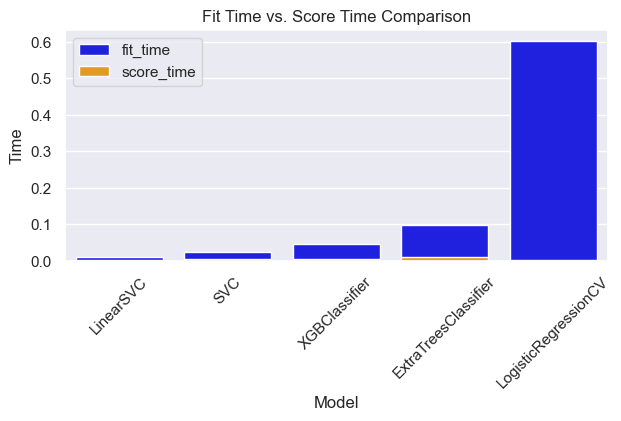

In [282]:
plot_speed_performance(top_models_result)

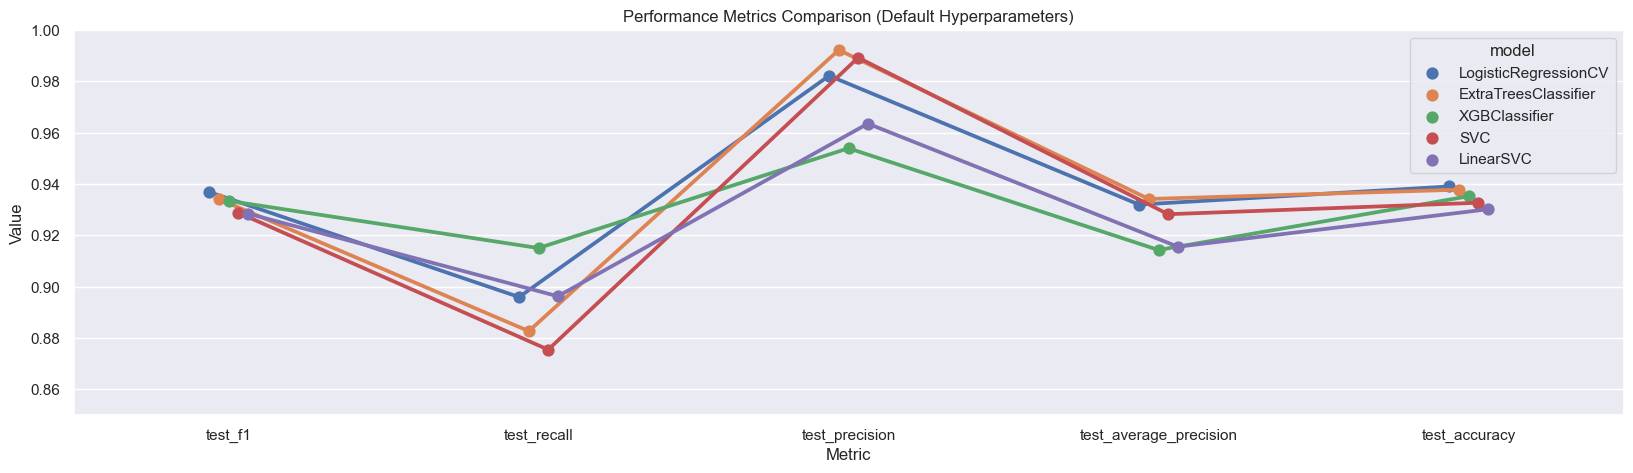

In [283]:
plot_metric_performance(top_models_result)

### 5.2 Tune Model with Hyperparameters: RandomSearchCV

In order to optimize the performance of our models, we conducted hyperparameter tuning using the <b>RandomizedSearchCV technique</b>. RandomizedSearchCV is a method for hyperparameter search that samples a specified number of parameter settings from a given distribution. This approach allows us to explore a wide range of hyperparameter combinations efficiently.

Advantages of RandomizedSearchCV:
- Efficient Exploration: RandomizedSearchCV performs a randomized search over the hyperparameter space, which allows for a more efficient exploration compared to an exhaustive grid search.
- Flexibility in Hyperparameter Search: It enables defining a probability distribution for each hyperparameter, allowing for a more flexible and customized search process.
- Parallelization: The search process can be parallelized across multiple computing cores or nodes, leading to faster hyperparameter tuning.

Disadvantages of RandomizedSearchCV:
- May Not Find the Optimal Solution: As the search is based on random sampling, there is no guarantee of finding the globally optimal hyperparameter combination. It relies on the assumption that good hyperparameters are likely to be found within the specified distribution range (<B>Note: In addition, I only used 10 iterations</b>).
- Computational Cost: RandomizedSearchCV requires evaluating multiple hyperparameter settings, which can be computationally expensive, particularly for complex models and large datasets.
- Manual Specification of Distribution: It requires defining the search space and probability distributions for each hyperparameter, which may require prior knowledge or trial and error.

We chose to use RandomizedSearchCV instead of GridSearchCV because it offers advantages in terms of efficiency and flexibility. With a large number of hyperparameters to tune and considering the computational resources available, RandomizedSearchCV allows us to explore a wide range of hyperparameter configurations more effectively. Additionally, it provides the ability to parallelize the search process, further reducing the overall tuning time.

In [284]:
def save_model(model: BaseEstimator, file_path: str) -> None:
    """save a machine learning model to a file."""
    dump(model, file_path)

def load_model(file_path: str) -> BaseEstimator:
    """load a machine learning model from a file."""
    model = load(file_path)
    return model

def save_params(params: dict, file_path: str) -> None:
    """save hyperparameters to a file."""
    dump(params, file_path)

def load_params(file_path: str) -> dict:
    """load hyperparameters from a file."""
    params = load(file_path)
    return params

In [285]:
def perform_hyperparameter_search(model: BaseEstimator, param_grid: dict) -> RandomizedSearchCV:
    """
    perform a search to find the best hyperparameter values for an ml model.

    Args:
        model: ml model
        param_grid: range of values for each hyperparameter to search from

    Returns: tuner used with its results

    """
    name = model.__class__.__name__
    print(f"{name} hyperparameter search now in progress...")

    start_time = time.time()

    # create scoring
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'average_precision': make_scorer(average_precision_score)
    }

    # initialized random search
    kfold = KFold(n_splits=5, shuffle=True, random_state=69)
    random_search = RandomizedSearchCV(model, param_grid, cv=kfold, n_iter=10, scoring=scoring, refit='f1', verbose=3)
    random_search.fit(X_train,y_train)

    elapsed_time = time.time() - start_time
    print(f"{name} hyperparameter search took: {elapsed_time:.2f} seconds")
    print("===============================================================\n")

    return random_search


def store_results(search_result: RandomizedSearchCV, results: list, model_name: str) -> None:
    """store the mean speed and metric performance of the cross validation results"""
    # store results
    cv_results = pd.DataFrame(data={
        'model': model_name,
        'fit_time': [search_result.cv_results_['mean_fit_time'][search_result.best_index_]],
        'score_time': [search_result.cv_results_['mean_score_time'][search_result.best_index_]],
        'test_accuracy': [search_result.cv_results_['mean_test_accuracy'][search_result.best_index_]],
        'test_precision': [search_result.cv_results_['mean_test_precision'][search_result.best_index_]],
        'test_recall': [search_result.cv_results_['mean_test_recall'][search_result.best_index_]],
        'test_f1': [search_result.cv_results_['mean_test_f1'][search_result.best_index_]],
        'test_average_precision': [search_result.cv_results_['mean_test_average_precision'][search_result.best_index_]]
    })
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = model_name
    results.append(this_df)

#### 5.2.1 LogisticRegressionCV

In [286]:
def tune_logistic_regression_cv(X_train: np.ndarray, y_train: np.ndarray, results: list, models_dir: str ='models') -> RandomizedSearchCV:
    """
    tune the hyperparameters of LogisticRegressionCV model.

    Args:
        y_train: training split features
        X_train: training split target
        results: list where performance results will be stored
        models_dir: directory to where the tuned model will be saved

    Returns: model trained with the best hyperparameters

    """
    param_grid = {
        'penalty': ['l1', 'l2'],
        'Cs': [1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300]
    }

    # create model
    model = linear_model.LogisticRegressionCV()
    search_result = perform_hyperparameter_search(model=model, param_grid=param_grid)
    # store results
    name = model.__class__.__name__
    store_results(search_result=search_result, results=results, model_name=name)

    # fit model with the best parameters then save it
    best_params = search_result.best_params_
    model = linear_model.LogisticRegressionCV(**best_params)
    model.fit(X_train, y_train)

    save_model(model, f"{models_dir}/{name}.pkl")
    save_params(best_params, f"{models_dir}/{name}_params.pkl")

    return model

#### 5.2.2 ExtraTreesClassifier

In [287]:
def tune_extra_trees_classifier(X_train: np.ndarray, y_train: np.ndarray, results: list, models_dir: str ='models') -> RandomizedSearchCV:
    """
    tune the hyperparameters of ExtraTreesClassifier model.

    Args:
        X_train: training split features
        y_train: training split target
        results: list where performance results will be stored
        models_dir: directory to where the tuned model will be saved

    Returns: model trained with the best hyperparameters

    """
    param_grid = {
        'n_estimators': stats.randint(100, 500),
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': stats.randint(2, 10),
        'min_samples_leaf': stats.randint(1,5),
        'max_features': stats.uniform(.5,.5)
    }
    model = ensemble.ExtraTreesClassifier()
    search_result = perform_hyperparameter_search(model=model, param_grid=param_grid)
    # store results
    name = model.__class__.__name__
    store_results(search_result=search_result, results=results, model_name=name)

    # fit model with the best parameters then save it
    best_params = search_result.best_params_
    model = ensemble.ExtraTreesClassifier(**best_params)
    model.fit(X_train, y_train)


    save_model(model, f"{models_dir}/{name}.pkl")
    save_params(best_params, f"{models_dir}/{name}_params.pkl")

    return model

#### 5.2.3 XGBClassifier

In [288]:
def tune_xgbclassifier(X_train: np.ndarray, y_train: np.ndarray, results: list, models_dir: str ='models') -> RandomizedSearchCV:
    """
    tune the hyperparameters of XGBClassifier model.

    Args:
        y_train: training split features
        X_train: training split target
        results: list where performance results will be stored
        models_dir: directory to where the tuned model will be saved

    Returns: model trained with the best hyperparameters

    """
    param_grid = {
        'n_estimators': stats.randint(100, 500),
        'max_depth': stats.randint(3, 10),
        'learning_rate': stats.uniform(.01),
        'subsample': stats.uniform(.5,.5),
        'colsample_bytree': stats.uniform(.5,.5),
        'gamma': stats.uniform(0,5),
        'reg_alpha': stats.uniform(0,1),
        'reg_lambda': stats.uniform(0,1)
    }

    # create model
    model = XGBClassifier()
    search_result = perform_hyperparameter_search(model=model, param_grid=param_grid)
    # store results
    name = model.__class__.__name__
    store_results(search_result=search_result, results=results, model_name=name)

    # fit model with the best parameters then save it
    best_params = search_result.best_params_
    model = XGBClassifier(**best_params)
    model.fit(X_train, y_train, eval_metric='logloss')

    save_model(model, f"{models_dir}/{name}.pkl")
    save_params(best_params, f"{models_dir}/{name}_params.pkl")

    return model

#### 5.2.4 SVC

In [289]:
def tune_svc(X_train: np.ndarray, y_train: np.ndarray, results: list, models_dir: str ='models') -> RandomizedSearchCV:
    """
    tune the hyperparameters of SVC model.

    Args:
        y_train: training split features
        X_train: training split target
        results: list where performance results will be stored
        models_dir: directory to where the tuned model will be saved

    Returns: model trained with the best hyperparameters

    """
    param_grid = {
        'C': stats.uniform(0.1, 10),
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'] + list(stats.randint(1, 10).rvs(size=10))
    }

    # create model
    model = svm.SVC()
    search_result = perform_hyperparameter_search(model=model, param_grid=param_grid)
    # store results
    name = model.__class__.__name__
    store_results(search_result=search_result, results=results, model_name=name)

    # fit model with the best parameters then save it
    best_params = search_result.best_params_
    model = svm.SVC(**best_params)
    model.fit(X_train, y_train)

    save_model(model, f"{models_dir}/{name}.pkl")
    save_params(best_params, f"{models_dir}/{name}_params.pkl")

    return model

#### 5.2.5 LinearSVC

In [290]:
def tune_linear_svc(X_train: np.ndarray, y_train: np.ndarray, results: list, models_dir: str ='models') -> RandomizedSearchCV:
    """
    tune the hyperparameters of linear svc model.

    Args:
        y_train: training split features
        X_train: training split target
        results: list where performance results will be stored
        models_dir: directory to where the tuned model will be saved

    Returns: model trained with the best hyperparameters

    """
    param_grid = {
        'C': stats.uniform(0.1, 10),
        'penalty': ['l1', 'l2'],
        'loss': ['hinge', 'squared_hinge']
    }

    # create model
    model = svm.LinearSVC()
    search_result = perform_hyperparameter_search(model=model, param_grid=param_grid)
    # store results
    name = model.__class__.__name__
    store_results(search_result=search_result, results=results, model_name=name)

    # fit model with the best parameters then save it
    best_params = search_result.best_params_
    model = svm.LinearSVC(**best_params)
    model.fit(X_train, y_train)

    save_model(model, f"{models_dir}/{name}.pkl")
    save_params(best_params, f"{models_dir}/{name}_params.pkl")


    return model

#### 5.2.6 Perform hyperparameter tuning
After preparing the models and the set of hyperparameters that we want to search from, we now perform the tuning.

In [291]:
X = X_train_resampled.values
y = y_train_resampled.values

In [292]:
# tuned_model_result = []
## perform hyperparameter tuning
# model_extra_trees_classifier = tune_extra_trees_classifier(X, y, results=tuned_model_result, models_dir='models') # finished: 1h+
# model_xgbclassifier = tune_xgbclassifier(X, y, results=tuned_model_result, models_dir='models') # finished: 19mins
# # model_logistic_regression_cv = tune_logistic_regression_cv(X, y, results=tuned_model_result, models_dir='models') # stopped: took longer than 10h
# # model_svc = tune_svc(X, y, results=tuned_model_result, models_dir='models') # stopped: took longer than 3h
# model_linear_svc = tune_linear_svc(X, y, results=tuned_model_result, models_dir='models') # finished, but failed to converge: 24mins

# load pre-tuned models
model_extra_trees_classifier = load_model('models/ExtraTreesClassifier.pkl')
model_xgbclassifier = load_model('models/XGBClassifier.pkl')
model_linear_svc = load_model('models/LinearSVC.pkl')

In [293]:
# # save base model result
# base_model_result = top_models_result.copy()
# base_model_result.to_csv('results/base_model_result.csv', index=False)

# # load base model result
base_model_result = pd.read_csv('results/base_model_result.csv', index_col='model')

In [294]:
# # save tuned model result
# tuned_model_result = pd.concat(tuned_model_result, ignore_index=True)
# tuned_model_result.to_csv('results/tuned_model_result.csv', index=False)

# load tuned model result
tuned_model_result = pd.read_csv('results/tuned_model_result.csv', index_col='model')

### 5.3 Tuned Models Performance
To assess the performance of our tuned models, we compared the results of three selected models:
1. ExtraTreeClassifier,
2. XGBClassifier,
3. LinearSVC


Due to the extended duration of hyperparameter search for the other two models, we focused on these three models for evaluation.

#### 5.3.1 Base Performance
We examine the base performance of the three models by plotting their respective performance metrics against each other. This will serve as the baseline understanding on how these models performed without hyperparameter tuning.


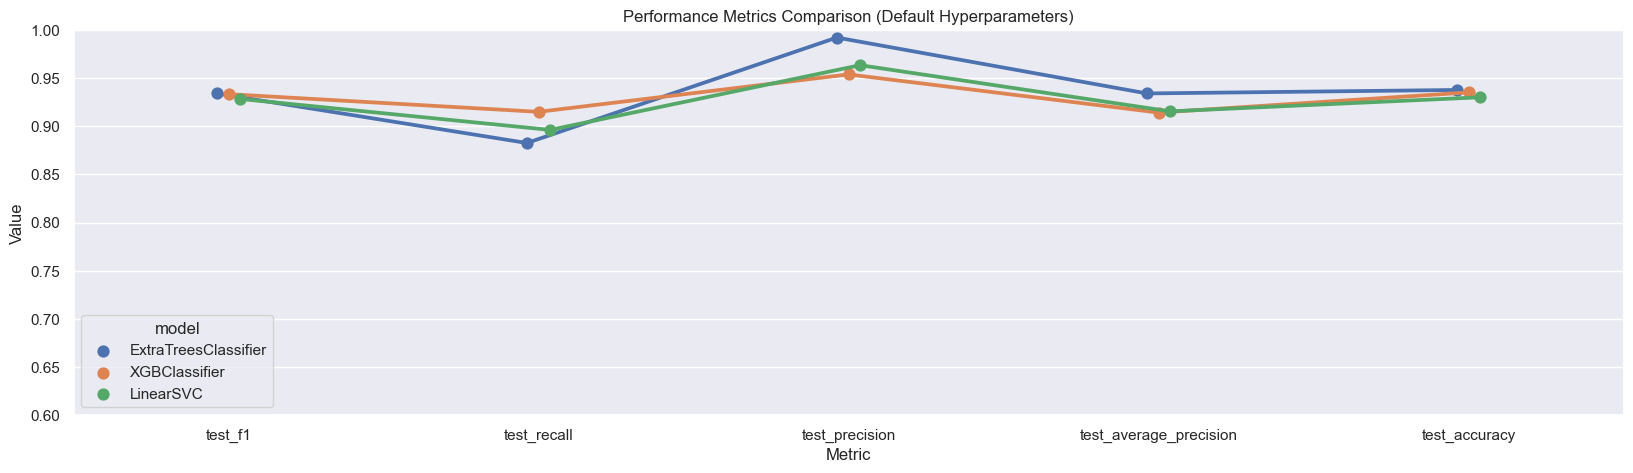

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision
model,,,,,,,
ExtraTreesClassifier,0.099823,0.010002,0.937821,0.992270,0.882717,0.934194,0.934208
XGBClassifier,0.045810,0.005801,0.935266,0.953972,0.915090,0.933484,0.914321
LinearSVC,0.011203,0.002201,0.930194,0.963570,0.896301,0.928512,0.915607


In [295]:
models_name = ['ExtraTreesClassifier', 'XGBClassifier', 'LinearSVC']

# plot metric performance of the 3 models
plot_metric_performance(base_model_result.loc[models_name].reset_index(), ymin=.6)
base_model_result

#### 5.3.2 Tuned Performance
Next, we assess the tuned performance of the three models. After conducting hyperparameter tuning using RandomSearchCV, we plot the performance metrics of the tuned models against each other. This will serve to compare the improved performance after optimizing the hyperparameters.
- ~~Fuck. it dropped~~
- The result is definitely not what we hoped for. Although the accuracy had an increase, it had a huge decline in all other metrics.
- LinearSVC performed the worst which was something I expected. During its hyperparameter search, it failed to converge which means that it was not able to find the most optimal hyperparameters.

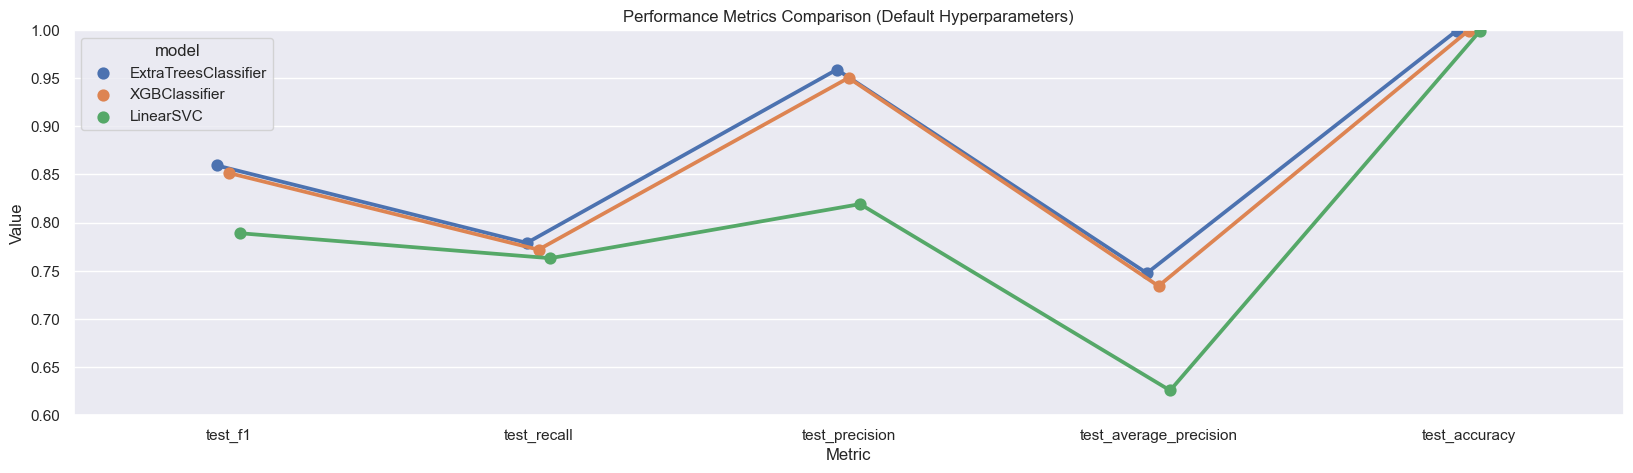

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_average_precision
model,,,,,,,
ExtraTreesClassifier,88.381550,0.785257,0.999565,0.959037,0.778918,0.859367,0.747493
XGBClassifier,11.550483,0.046275,0.999539,0.950389,0.771886,0.851644,0.734102
LinearSVC,50.056237,0.024846,0.999302,0.819236,0.763029,0.788967,0.625594


In [296]:
# plot metric performance of the 3 models
plot_metric_performance(tuned_model_result.reset_index(), ymin=.6)
tuned_model_result

#### 5.3.3 Base vs Tuned Performance
To gain further insights, we visualize the tuned performance of the three models against their respective base performance.
- Looking at our primary metric 'F1-score', we observe that the tuned models performed worse and did not give an improvement.

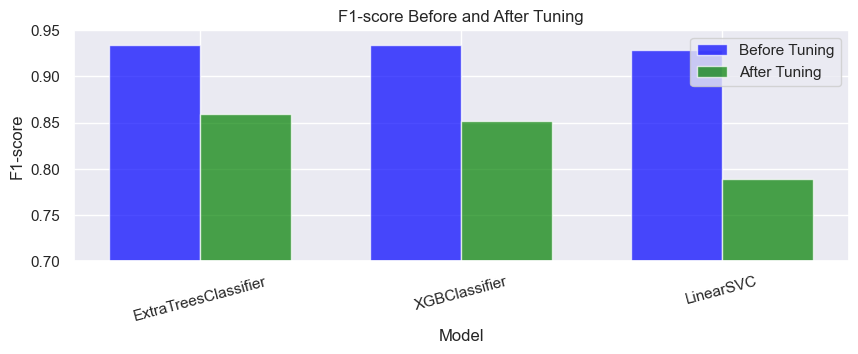

In [297]:
primary_metric = 'test_f1'

f1_score_before = base_model_result[primary_metric]
f1_score_after = tuned_model_result[primary_metric]
# f1_score_after = tuned_model_result[primary_metric]

plt.figure(figsize=(10, 3))
x = np.arange(len(f1_score_before))
bar_width = 0.35

# Plot the F1-score before and after tuning
plt.bar(x, f1_score_before, width=bar_width, color='blue', alpha=0.7, label='Before Tuning')
plt.bar(x + bar_width, f1_score_after, width=bar_width, color='green', alpha=0.7, label='After Tuning')

plt.xlabel('Model')  # Set the x-axis label
plt.ylabel('F1-score')  # Set the y-axis label
plt.title('F1-score Before and After Tuning')  # Set the plot title
plt.xticks(x + bar_width / 2, f1_score_before.index, rotation=15)  # Set the x-axis tick positions and labels
plt.ylim(.7, .95)
plt.legend()

plt.show()

### 5.4 Alternative: Best Default Model
Upon evaluating the performance of the tuned models, it was unexpected to find that the hyperparameter tuning process worsened their performance. In such a scenario, we need to reconsider our approach. As a solution, we will revert to using the top performing models in their default form, with their default hyperparameters, as their performance was already relatively decent to begin with.

Now how do choose the top models again? Our primary metric was f1-score and we see that the difference in their f1-score is very minimal at .8% at most. Alternatively, we can consider the secondary metric, 'recall,' to select our final model.

However, we can utilize the 'average_precision_score' metric, which provides a comprehensive summary of the trade-off between precision and recall across different decision thresholds. A higher average_precision_score indicates that the model effectively classifies the different classes, even in the presence of class imbalance. To visualize this, we plot the precision-recall curve and calculate the AUPRC (Area Under the Precision-Recall Curve). The larger the area covered from the top right corner, the better the performance of the classifier.
- With an AP score of 0.9845, our top model is ExtraTreesClassifier!

In [298]:
%%time
# create base models
base_lgcv = linear_model.LogisticRegressionCV(max_iter=10000)
base_etc = ensemble.ExtraTreesClassifier()
base_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
base_svc = svm.SVC()
base_lsvc = svm.LinearSVC(max_iter=10000)

# create predictions (probabilities)
kfold = KFold(n_splits=5, shuffle=True, random_state=69)

base_lgcv_pred = cross_val_predict(base_lgcv, X, y, cv=kfold, method='predict_proba')
base_etc_pred = cross_val_predict(base_etc, X, y, cv=kfold, method='predict_proba')
base_xgb_pred = cross_val_predict(base_xgb, X, y, cv=kfold, method='predict_proba')
base_svc_pred = cross_val_predict(base_svc, X, y, cv=kfold, method='predict')
base_lsvc_pred = cross_val_predict(base_lsvc, X, y, cv=kfold, method='decision_function')

Wall time: 10.1 s


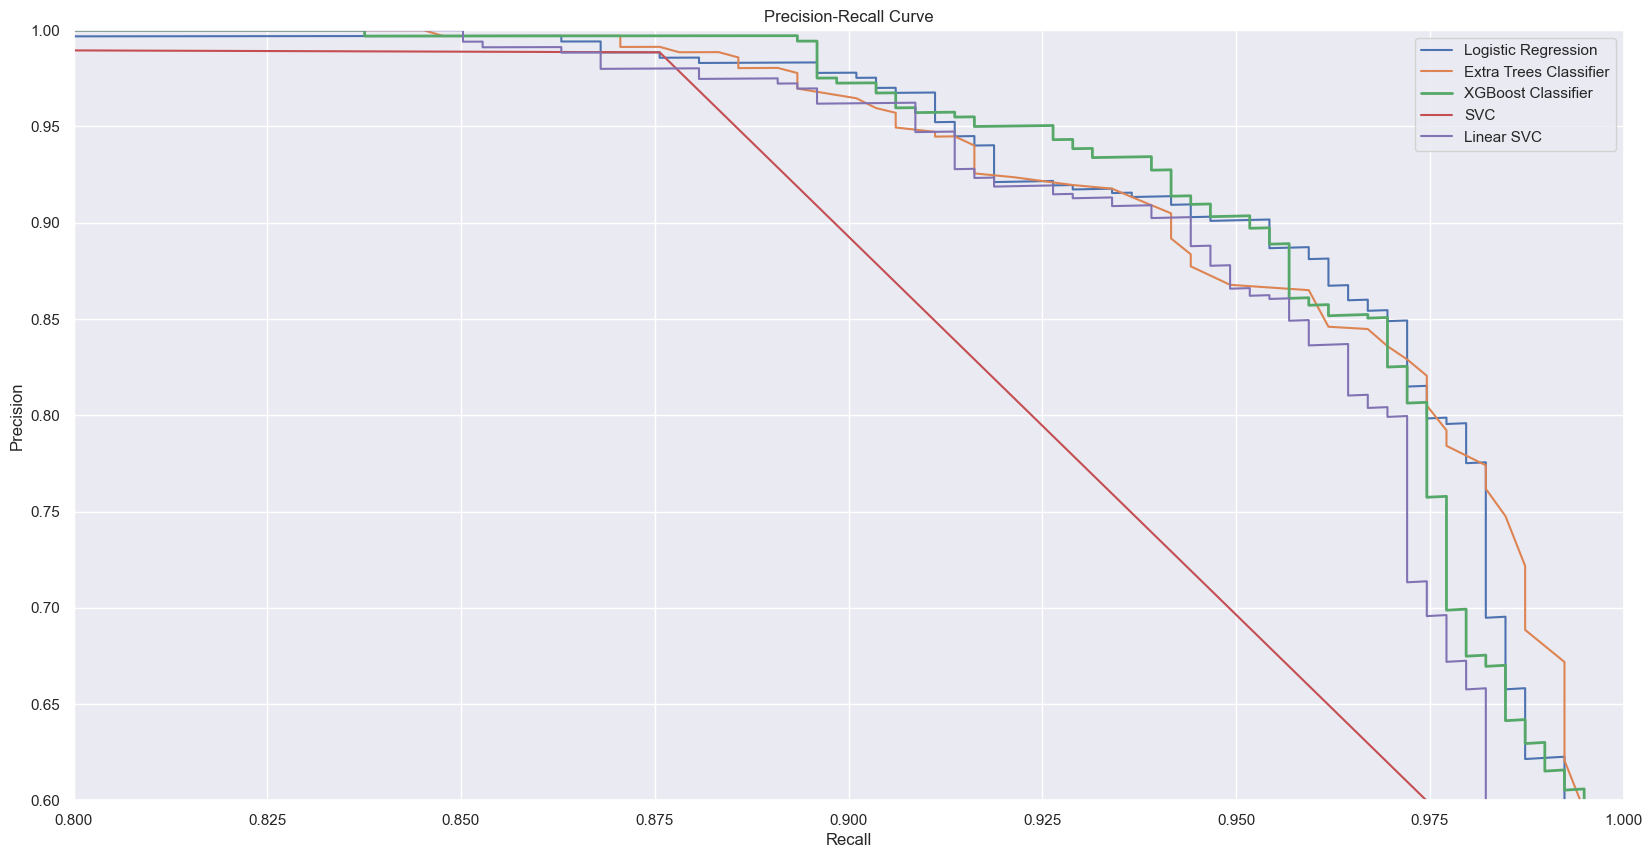

In [299]:
# Compute precision-recall curves for each model for positive class
precision_lgcv, recall_lgcv, _ = precision_recall_curve(y, base_lgcv_pred[:, 1])
precision_etc, recall_etc, _ = precision_recall_curve(y, base_etc_pred[:, 1])
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y, base_xgb_pred[:, 1])
precision_svc, recall_svc, _ = precision_recall_curve(y, base_svc_pred)
precision_lsvc, recall_lsvc, _ = precision_recall_curve(y, base_lsvc_pred)

# Plot precision-recall curves
plt.figure(figsize=(20, 10))
plt.plot(recall_lgcv, precision_lgcv, label='Logistic Regression')
plt.plot(recall_etc, precision_etc, label='Extra Trees Classifier')
plt.plot(recall_xgb, precision_xgb, label='XGBoost Classifier', linewidth=2)
plt.plot(recall_svc, precision_svc, label='SVC')
plt.plot(recall_lsvc, precision_lsvc, label='Linear SVC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(.8, 1.)
plt.ylim(.6, 1.)
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [300]:
# Note: we already have a value of the AP scores for each model but we'll compute it again just to match the precision-recall curve above
# Compute average precision scores for each model
ap_score_lgcv = average_precision_score(y, base_lgcv_pred[:,1])
ap_score_etc = average_precision_score(y, base_etc_pred[:,1])
ap_score_xgb = average_precision_score(y, base_xgb_pred[:,1])
ap_score_svc = average_precision_score(y, base_svc_pred)
ap_score_lsvc = average_precision_score(y, base_lsvc_pred)

ap_scores = {
    base_lgcv.__class__.__name__:ap_score_lgcv,
    base_etc.__class__.__name__: ap_score_etc,
    base_xgb.__class__.__name__:ap_score_xgb,
    base_svc.__class__.__name__:ap_score_svc,
    base_lsvc_pred.__class__.__name__:ap_score_lsvc
}
ap_scores_sorted = pd.Series(data=ap_scores).sort_values(ascending=False)
ap_scores_sorted

XGBClassifier           0.984307
LogisticRegressionCV    0.983743
ExtraTreesClassifier    0.983516
ndarray                 0.980014
SVC                     0.927781
dtype: float64

In [301]:
top_model, top_score = np.squeeze(ap_scores_sorted.iloc[[0]].index), ap_scores_sorted.iloc[0]

print(f"With an AP score of {top_score}, our top model is {top_model}!")

With an AP score of 0.98430665113944, our top model is XGBClassifier!


### 5.5 Model Evaluation with Test Set
We now finally evaluate our model on the test set (who already fell asleep due to the long wait going 'Zzzz').

In [302]:
# train models
base_lgcv.fit(X, y)
base_etc.fit(X, y) # only model we'll use
base_xgb.fit(X, y)
base_svc.fit(X, y)
base_lsvc.fit(X, y)

LinearSVC(max_iter=10000)

#### 5.5.1 Confusion Matrix
- True Negative (top left)- This is the number of correctly classifications of the "No" (No Fraud Detected) class.
- False Positive (top right)- This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.
- False Negative (bottom left)- This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class.
- True Positive (bottom right)- This is the number of correctly classifications of the "Yes" (Fraud Detected) class.


In [303]:
def plot_confusion_metrics(cm: pd.DataFrame, title: str = 'Confusion Matrix') -> None:
    """
    plot confusion matrix using the following format:

                     Predicted Negative    Predicted Positive
Actual Negative       TN (Top Left)       FP (Top Right)
Actual Positive       FN (Bottom Left)    TP (Bottom Right)


    Args:
        cm: confusion matrix

    Returns: None
    """

    # plot confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xlabel='Predicted label',
           ylabel='True label',
           title=title)
    ax.grid(False)
    cbar = ax.figure.colorbar(im, ax=ax)

    thresh = cm.max() / 2.0  # for text coloring
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')

    # Show the plot
    plt.show()

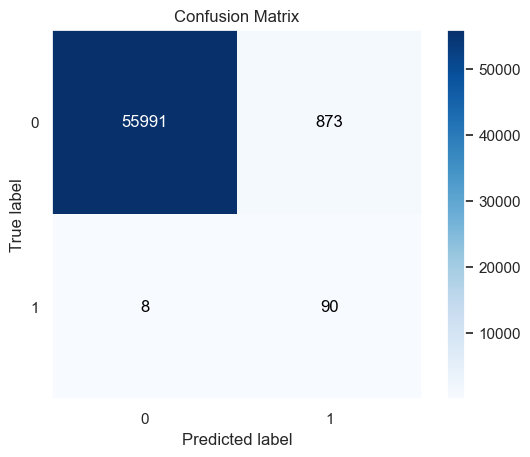

In [304]:
y_pred = base_etc.predict(X_test.values)
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_metrics(cm)

#### 5.5.2 Metrics Performance
<b>Precision</b>: The precision score is very low, measuring approximately 10%. This indicates that of all the transactions predicted by the model to be fraudulent, only around 10% are truly fraudulent.
<b>Recall</b>: On the other hand, the recall score is decently high, measuring above 92%. This means that of all the transactions that are actually fraudulent, our model correctly predicted more than 92% of them.
<b>F1-Score</b>: The F1-Score, which provides a balanced assessment of precision and recall, is also very low, measuring around 19%. Given the low precision score, the F1-Score is significantly affected and reflects the model's overall performance.

In [305]:
# test the model
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.92      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



## 6. Validate and Implement
For the next part we'll also try an ensemble <b>VotingClassifier</b> by combining our other models. While it is <u>not commonly used in production</u>, it has been observed to <u>provide a slight boost performance in Kaggle competitions</u>, as mentioned in various blogs and discussions.

Despite its limited usage in real-world scenarios, we'll do it anyway to see if it can further improve the predictive performance against our primary model.

In [306]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples, each containing the model name and the tuned model instance
models = [
    ('lgcv', base_lgcv),
    ('etc', base_etc), # our top model
    ('xgb', base_xgb),
    ('svc', base_svc),
    ('lscvc', base_lsvc),
]

# # Create a VotingClassifier with 'hard' voting
# voting_classifier = VotingClassifier(estimators=models, voting='hard')
#
# # Fit the VotingClassifier on your training data
# voting_classifier.fit(X, y)
# save_model(voting_classifier, 'models/VotingClassifier.pkl')

voting_classifier = load_model('models/VotingClassifier.pkl')

### 6.1 Model Evaluation with Test Set

#### 6.1.2 Confusion Matrix (VotingClassifier vs. ExtraTreesClassifier Comparison)
- True Negative (top left)- This is the number of correctly classifications of the "No" (No Fraud Detected) class.
- False Positive (top right)- This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.
- False Negative (bottom left)- This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class.
- True Positive (bottom right)- This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

ExtraTreesClassifier seems to have performed better.


In [307]:
y_pred_vote = voting_classifier.predict(X_test.values)

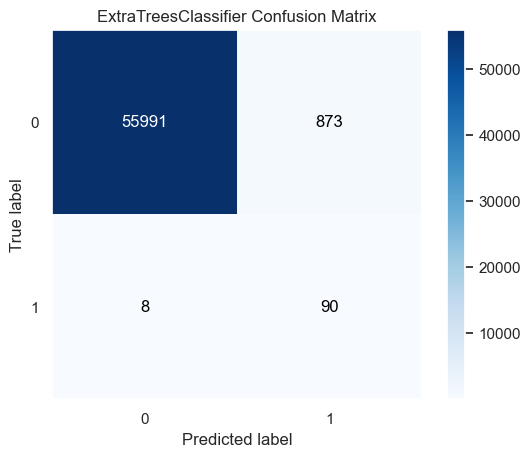

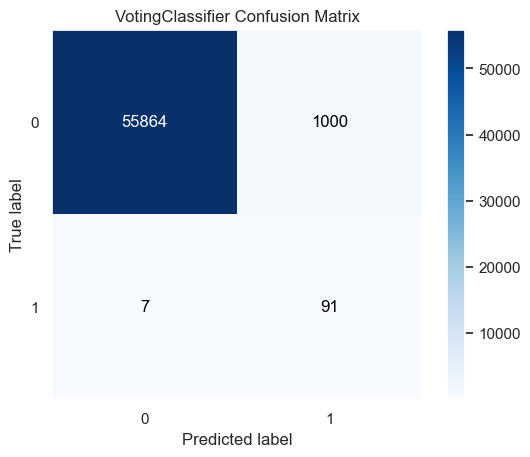

In [308]:
cm_vote = confusion_matrix(y_test.values, y_pred_vote)
plot_confusion_metrics(cm, title='ExtraTreesClassifier Confusion Matrix')
plot_confusion_metrics(cm_vote, title='VotingClassifier Confusion Matrix')

#### 5.5.2 Metrics Performance (VotingClassifier vs. ExtraTreesClassifier  Comparison)
<b>Precision</b>: VotingClassifier is 1% higher at 93% vs 92%.
<b>Recall</b>: VotingClassifier is 2% lower at 8% vs 10%.
<b>F1-Score</b>: Voting Classifier is 4% lower at 15% vs 19%.

Our top model ExtraTreesClassifier beats the VotingClassifier.

In [309]:
print('ExtraTreesClassifier report')
print(classification_report(y_test.values, y_pred))

ExtraTreesClassifier report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.92      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



In [310]:
print('VotingClassifier report')
print(classification_report(y_test.values, y_pred_vote))

VotingClassifier report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.93      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



## 7. Optimize and Strategize
In conclusion, the <i>ExtraTreesClassifier</i>, an ensemble model, <u>emerged as the best-performing model for predicting fraudulent credit card transactions</u>. However, there are several limitations and areas for improvement to consider.

One limitation is that we only performed undersampling to address the class imbalance, using a 50:50 ratio. Undersampling can lead to information loss from the majority class and potentionally affect model performance. Exploring different ratios or alternative techniques, such as oversampling or SMOTE, coul be beneficial in mitigating the impact of class imbalance more effectively.

Additionally, the hyperparameter tuning process using RandomizedSearchCV with 10 iterations did not yield satisfactory results. It may be necessary to modify the hyperparameters to search from or increase the number of iterations to improve the tuning process. Exploring alternative techniques like GridSearchCV, although time-consuming, could also be considered for a more comprehensive hyperparameter search.

Furthermore, the <i>VotingClassifier</i>, which combines the predictions of multiple top-performing models, did not outperform the individual top model. This is understandable as the top models were not extensively tuned. In the future, it might be more efficient to focus on optimizing a single model, considering the time requirements associated with tuning multiple models.

Throughout our discussion, we have covered various aspects, including data preparation, exploratory analysis, dimensionality reduction, hyperparameter tuning, multiple model comparison, and model evaluation. Despite the challenges faced, this project has provided valuable insights into the detection of fraudulent credit card transactions and importance of addressing class imbalance.

To further improve the model, additional considerations could include feature engineering to capture more meaningful patterns. It would be beneficial to evaluate the model's predictions and analyze which features it considered the most influential during the decision-making process. This analysis can provide valuable insights and potentially lead to new ideas for feature engineering. By understanding the features that strongly contribute to the model's predictions, we can focus on enhancing those specific aspects of the dataset and potentially improve the model's performance in detecting fraudulent card transactions.

Overall the journey of developing a fraud detection model has highlighted the complexities involved and the need for iterative improvements and fine-tuning to achieve optimal performance.

## References
[A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-3:-Prepare-Data-for-Consumption)- provided a comprehensive workflow for ml projects.
[Quickly Compare Multiple Models](https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0)- provided guidance to train and evaluate multiple models efficiently
[Imbalanced Dataset || Fraud Detection](https://www.kaggle.com/code/linhanphm/imbalanced-dataset-fraud-detection)- provided guidance in how they approached the task and in dealing with imbalanced datasets.
[Credit Fraud || Dealing with Imbalanced Datasets](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook)- provided guidance in how they approached the task and in dealing with imbalanced datasets.